1.Load the Bank Full Data Set

In [1]:
import pandas as pd

filePath = '/content/bank-full.csv'
rawData = pd.read_csv(filePath, header=None)

2.Split the data

In [2]:
splitData = rawData[0].str.split(';', expand=True)

splitData.columns = splitData.iloc[0]  # Set the first row as headers
splitData = splitData[1:]  # Remove the first row because it's used as headers

# Remove double quotes
splitData = splitData.replace('"', '', regex=True)
splitData.columns = splitData.columns.str.replace('"', '', regex=True)
print("\nFirst 5 rows:")
print(splitData.head())



First 5 rows:
0 age           job  marital  education default balance housing loan  contact  \
1  58    management  married   tertiary      no    2143     yes   no  unknown   
2  44    technician   single  secondary      no      29     yes   no  unknown   
3  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
4  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
5  33       unknown   single    unknown      no       1      no   no  unknown   

0 day month duration campaign pdays previous poutcome   y  
1   5   may      261        1    -1        0  unknown  no  
2   5   may      151        1    -1        0  unknown  no  
3   5   may       76        1    -1        0  unknown  no  
4   5   may       92        1    -1        0  unknown  no  
5   5   may      198        1    -1        0  unknown  no  


3. Check for missing values

In [3]:
missingValues = splitData.isnull().sum()
print("Missing values per column:\n", missingValues)

Missing values per column:
 0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


4.Checking for 'none" values

In [4]:
#Check for occurrences of "None" in each column
noneCounts = splitData.isin(['None']).sum()

# Display results
print("\nOccurrences of 'None' in each column:")
print(pd.DataFrame({'Count': noneCounts}))




Occurrences of 'None' in each column:
           Count
0               
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0


5.Capping outliers

In [5]:
import numpy as np

# Convert numeric columns to appropriate data types
numericColumns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
splitData[numericColumns] = splitData[numericColumns].apply(pd.to_numeric)

# Detect and handle outliers using the IQR method with capping
def cap_outliers_iqr(df, numeric_columns):
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

SplitData = cap_outliers_iqr(splitData, numericColumns)
print(splitData.head())


0   age           job  marital  education default  balance housing loan  \
1  58.0    management  married   tertiary      no     2143     yes   no   
2  44.0    technician   single  secondary      no       29     yes   no   
3  33.0  entrepreneur  married  secondary      no        2     yes  yes   
4  47.0   blue-collar  married    unknown      no     1506     yes   no   
5  33.0       unknown   single    unknown      no        1      no   no   

0  contact  day month  duration  campaign  pdays  previous poutcome   y  
1  unknown    5   may       261         1     -1         0  unknown  no  
2  unknown    5   may       151         1     -1         0  unknown  no  
3  unknown    5   may        76         1     -1         0  unknown  no  
4  unknown    5   may        92         1     -1         0  unknown  no  
5  unknown    5   may       198         1     -1         0  unknown  no  


6.Converting the numeric columns to integers

In [11]:
# Convert numerical variables to integers
splitData[numericColumns] = splitData[numericColumns].astype(int)

print("\nNumerical variables converted to integers:")
print(splitData.head())




Numerical variables converted to integers:
0  age           job  marital  education default  balance housing loan  \
1   58    management  married   tertiary      no     2143     yes   no   
2   44    technician   single  secondary      no       29     yes   no   
3   33  entrepreneur  married  secondary      no        2     yes  yes   
4   47   blue-collar  married    unknown      no     1506     yes   no   
5   33       unknown   single    unknown      no        1      no   no   

0  contact  day month  duration  campaign  pdays  previous poutcome   y  
1  unknown    5   may       261         1     -1         0  unknown  no  
2  unknown    5   may       151         1     -1         0  unknown  no  
3  unknown    5   may        76         1     -1         0  unknown  no  
4  unknown    5   may        92         1     -1         0  unknown  no  
5  unknown    5   may       198         1     -1         0  unknown  no  


7.Numerical column distribution

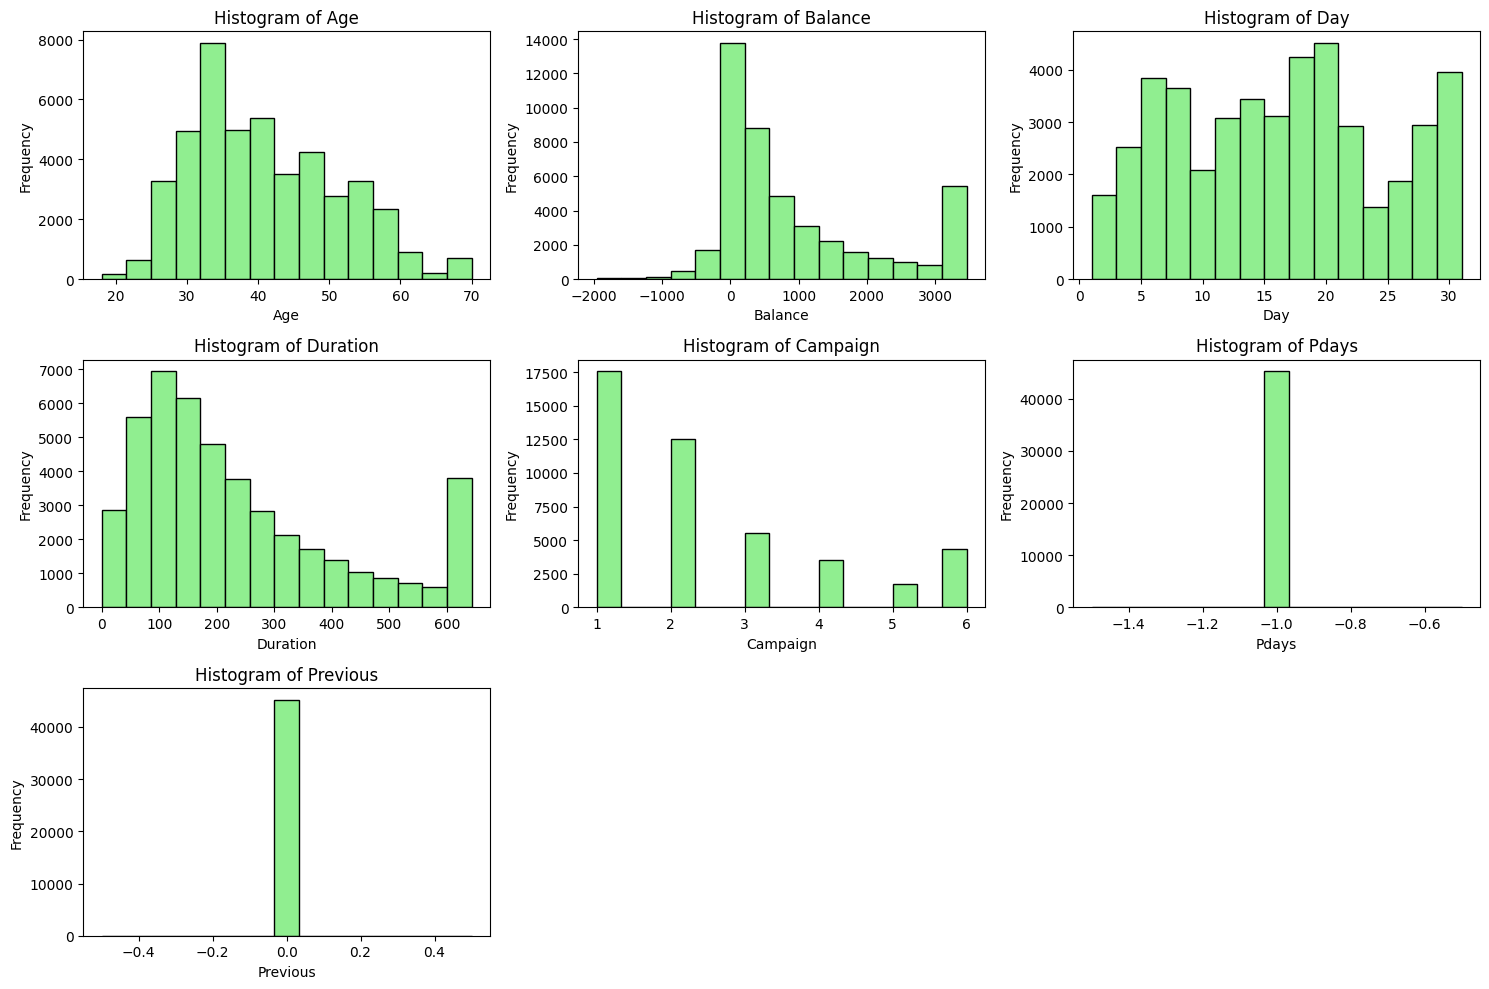

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of rows and columns for the grid
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate over each numerical column and plot
for i, col in enumerate(numericColumns):
    axes[i].hist(splitData[col], bins=15, color='lightgreen', edgecolor='black')
    axes[i].set_title(f"Histogram of {col.capitalize()}")
    axes[i].set_xlabel(f"{col.capitalize()}")
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots if the grid has more slots than needed
for j in range(len(numericColumns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
